In [1]:
from tensorflow.keras.models import load_model
import pandas as pd
from pickle import load
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline
sns.set()

In [2]:
model = load_model('new_model_very_good.h5', compile = False)

In [3]:
data = pd.read_csv('test_with_vanishing.csv')

In [4]:
scaler = load(open('scaler.pkl', 'rb'))

In [5]:
data.head()

,Positions X
0,-5239.66
1,-5239.66
2,-5239.66
3,-5239.66
4,-5239.66


In [6]:
data.dropna(inplace= True)

In [7]:
data.drop_duplicates(inplace= True)

In [8]:
data.shape

(649, 1)

In [9]:
data_scaled = scaler.transform(data)

In [10]:
last_positions = []
real_values = []
for i in range(10, 649):
    last_positions.append(data_scaled[i-10: i, 0])
    real_values.append(data.iloc[i, 0])

In [11]:
last_positions, real_values = np.array(last_positions), np.array(real_values)
last_positions = np.reshape(last_positions, (last_positions.shape[0], last_positions.shape[1], 1))

In [12]:
last_positions.shape

(639, 10, 1)

In [13]:
t0 = time.time()
predictions = model.predict(last_positions)
t1 = time.time()
delta = t1 - t0
delta = round(delta, 2)
print(f'O tempo para prever 639 posições foi: {delta} segundos')

O tempo para prever 639 posições foi: 0.86 segundos


In [14]:
predictions = scaler.inverse_transform(predictions)

In [15]:
data.head()

,Positions X
0,-5239.66
52,-5238.83
54,-5236.56
55,-5232.83
56,-5227.64


In [16]:
data.reset_index(inplace= True, drop= True)

In [17]:
data.head()

,Positions X
0,-5239.66
1,-5238.83
2,-5236.56
3,-5232.83
4,-5227.64


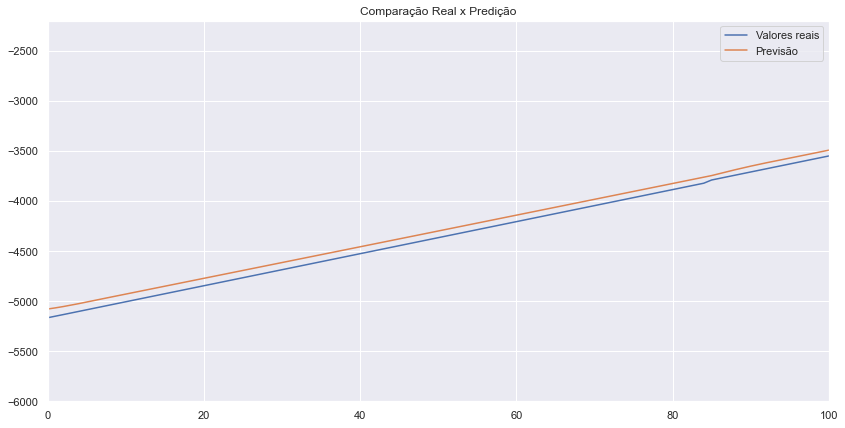

In [18]:
plt.figure(figsize= (14, 7))
plt.axis([0,100, -6000, -2200])
plt.title('Comparação Real x Predição')
plt.plot(real_values, label = 'Valores reais')
plt.plot(predictions, label =  'Previsão')
plt.legend()

In [33]:
predictions = np.reshape(predictions, (-1))

In [35]:
data2compare = pd.DataFrame({'real_values': real_values, 'predictions': predictions})

In [36]:
data2compare.head()

,real_values,predictions
0,-5165.69,-5078.563965
1,-5150.24,-5066.984863
2,-5134.13,-5053.969238
3,-5118.09,-5039.713379
4,-5102.08,-5024.585938


In [41]:
def round_value(value):
    return round(value, 2)
data2compare['predictions'] = data2compare['predictions'].apply(round_value)

In [42]:
data2compare.head()

,real_values,predictions
0,-5165.69,-5078.56
1,-5150.24,-5066.98
2,-5134.13,-5053.97
3,-5118.09,-5039.71
4,-5102.08,-5024.59


In [43]:
mean_absolute_error(data2compare['real_values'], data2compare['predictions'])

42.17801251956178